# 数据挖掘项目

1.导入相应的库和数据（注意原文件不是UTF-8编码，需要调整一下）

In [1]:
# data processing
import numpy as np
import pandas as pd
from pandas import datetime

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

#read data
data=pd.read_csv("D:/github/data.csv")


2.数据描述

In [2]:
data.describe()

,Unnamed: 0,custid,trade_no,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
count,4754.000000,4.754000e+03,4.754000e+03,4752.000000,4752.000000,4754.000000,4751.000000,4752.000000,4752.000000,4752.000000,...,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4450.000000,4457.000000
mean,6008.414178,1.690993e+06,2.018050e+31,0.021806,0.901294,1940.197728,14.160674,0.804411,0.365425,17.502946,...,3390.038142,1820.357864,9187.009199,76.042630,4.732331,5.227507,16153.690823,8007.696881,24.112809,55.181512
std,3452.071428,1.034235e+06,1.812890e+18,0.041527,0.144856,3923.971494,694.180473,0.196920,0.170196,4.475616,...,1474.206546,583.418291,7371.257043,14.536819,2.974596,3.409292,14301.037628,5679.418585,37.725724,53.486408
min,5.000000,1.140000e+02,2.018050e+31,0.000000,0.000000,0.000000,0.000000,0.120000,0.033000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,-2.000000
25%,3106.000000,7.593358e+05,2.018050e+31,0.010000,0.880000,0.000000,0.615000,0.670000,0.233000,15.000000,...,2300.000000,1535.000000,4800.000000,77.000000,2.000000,3.000000,7800.000000,4737.000000,5.000000,10.000000
50%,6006.500000,1.634942e+06,2.018050e+31,0.010000,0.960000,500.000000,0.970000,0.860000,0.350000,17.000000,...,3100.000000,1810.000000,7700.000000,79.000000,4.000000,5.000000,13800.000000,7050.000000,14.000000,36.000000
75%,8999.000000,2.597905e+06,2.018050e+31,0.020000,0.990000,2000.000000,1.600000,1.000000,0.480000,20.000000,...,4300.000000,2100.000000,11700.000000,80.000000,7.000000,7.000000,20400.000000,10000.000000,24.000000,91.000000
max,11992.000000,4.004694e+06,2.018050e+31,1.000000,1.000000,68000.000000,47596.740000,1.000000,0.941000,42.000000,...,10000.000000,6900.000000,87100.000000,87.000000,18.000000,20.000000,266400.000000,82800.000000,360.000000,323.000000


In [3]:
data.head()

,Unnamed: 0,custid,trade_no,bank_card_no,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
0,5,2791858,2.018050e+31,卡号1,0.01,0.99,0,0.90,0.55,0.313,...,2900.0,1688.0,1200.0,75.0,1.0,2.0,1200.0,1200.0,12.0,18.0
1,10,534047,2.018050e+31,卡号1,0.02,0.94,2000,1.28,1.00,0.458,...,3500.0,1758.0,15100.0,80.0,5.0,6.0,22800.0,9360.0,4.0,2.0
2,12,2849787,2.018050e+31,卡号1,0.04,0.96,0,1.00,1.00,0.114,...,1600.0,1250.0,4200.0,87.0,1.0,1.0,4200.0,4200.0,2.0,6.0
3,13,1809708,2.018050e+31,卡号1,0.00,0.96,2000,0.13,0.57,0.777,...,3200.0,1541.0,16300.0,80.0,5.0,5.0,30000.0,12180.0,2.0,4.0
4,14,2499829,2.018050e+31,卡号1,0.01,0.99,0,0.46,1.00,0.175,...,2300.0,1630.0,8300.0,79.0,2.0,2.0,8400.0,8250.0,22.0,120.0


3.删除无关变量

In [4]:
#trade_no，bank_card_no几乎是常量，custid推测为每个用户的id，id_name几乎unique也无关
#data去重
data=data.drop(['trade_no','bank_card_no','custid','source','id_name','Unnamed: 0'],axis=1)
data=data.drop_duplicates()

4.查看缺失值，此处参考chen19830的代码

In [5]:
def missing_values_table(df):
    #Total missing values
    mis_val=df.isnull().sum()
    
    #Percentage of missing values
    mis_val_percent=100*df.isnull().sum()/len(df)
    
    #Make a table with the results
    mis_val_table=pd.concat([mis_val,mis_val_percent],axis=1)
    
    #Rename the columns
    mis_val_table_ren_columns=mis_val_table.rename(columns={0:'Missing Values',1:'% of Total Values'})
    
    #Sort the table by percentage of missing descending
    mis_val_table_ren_columns=mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1]!=0].sort_values('% of Total Values',ascending=False).round(1)
    
    #Print some summary information
    print("Your selected dataframe has "+str(df.shape[1])+" columns.\n"+"There are "+str(mis_val_table_ren_columns.shape[0])+" columns that have missing values.")
    
    #Return the dataframe with missing informarion
    return mis_val_table_ren_columns

missing_values=missing_values_table(data)
missing_values.head()


Your selected dataframe has 84 columns.
There are 73 columns that have missing values.


,Missing Values,% of Total Values
student_feature,2998,63.1
cross_consume_count_last_1_month,426,9.0
query_cash_count,304,6.4
latest_three_month_apply,304,6.4
latest_one_month_apply,304,6.4


In [6]:
#注意到student_feature大部分都为1，其余为nan,此时考虑将nan填充为0
data['student_feature'].describe()
data['student_feature']=data['student_feature'].fillna(0)
data['student_feature'].describe()

count    4754.000000
mean        0.369794
std         0.483670
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: student_feature, dtype: float64

1.注意到reg_preference_for_trad几乎为5种类型变量，于是让文字转换为数字
2.同时注意到存在一些变量为时间变量，应考虑将其转化为0-1变量的数字

In [7]:
num_reg={'一线城市':'1','二线城市':'2','三线城市':'3','其他城市':'4','境外':'5'}
data['reg_preference_for_trad']=data['reg_preference_for_trad'].map(num_reg)
data['reg_preference_for_trad']=data['reg_preference_for_trad'].fillna(0)
data['reg_preference_for_trad']=data['reg_preference_for_trad'].astype('float')

In [8]:
#对于时间上为Nan的值，drop掉
data['first_transaction_time']=pd.to_datetime(data['first_transaction_time'],format='%Y%m%d').astype(np.int64)/1e12
data['first_transaction_time'].dropna(inplace=True)
df=data['first_transaction_time']
df_norm = (df - df.min()) / (df.max() - df.min())
data['first_transaction_time']=df_norm

In [9]:
data['latest_query_time']=pd.to_datetime(data['latest_query_time'],format='%Y/%m/%d').astype(np.int64)/1e12
data['latest_query_time'].dropna(inplace=True)

df=data['latest_query_time']
df_norm = (df - df.min()) / (df.max() - df.min())
data['latest_query_time']=df_norm

In [10]:
data['loans_latest_time']=pd.to_datetime(data['loans_latest_time'],format='%Y/%m/%d').astype(np.int64)/1e12
data['loans_latest_time'].dropna(inplace=True)
df=data['loans_latest_time']
df_norm = (df - df.min()) / (df.max() - df.min())
data['loans_latest_time']=df_norm

In [11]:
#其他考虑用均值填充,注意到其中有1个文字变量，两个时间变量
cols = missing_values.index
list=['latest_query_time','loans_latest_time','reg_preference_for_trad']
for col in cols:   
    if col not in list:
        data[col] = data[col].fillna(data[col].mean())

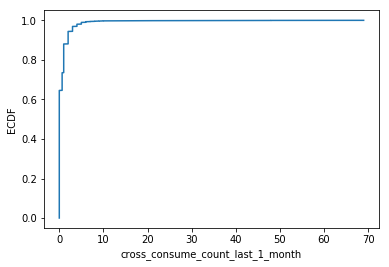

In [12]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF
#对cross_consume_count_last_1_month进行分析有：
cdf = ECDF(data['cross_consume_count_last_1_month'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.xlabel('cross_consume_count_last_1_month'); plt.ylabel('ECDF');

划分数据集

随机森林特征选择

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['status']), data['status'], test_size=.3, random_state=2018)

In [14]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=2018)
rfc.fit(X_train,y_train)
importance = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
rfc_result = importance[: 20].index.tolist()
X_train, X_test, y_train, y_test = train_test_split(data[rfc_result], data['status'], test_size=.3, random_state=2018)

特征衍生

#参考chen19830的代码
from sklearn.utils.multiclass  import type_of_target
from scipy import stats
import math
def woe(X, y, event=1):
    res_woe = []
    iv_dict = {}
    for feature in X.columns:
        x = X[feature].values
        # 1) 连续特征离散化
        if type_of_target(x) == 'continuous':
            x = discrete(x)
        # 2) 计算该特征的woe和iv
        # woe_dict, iv = woe_single_x(x, y, feature, event)
        woe_dict, iv = woe_single_x(x, y, feature, event)
        iv_dict[feature] = iv
        res_woe.append(woe_dict)

    return iv_dict


def discrete(x):
    # 使用5等分离散化特征
    res = np.zeros(x.shape)
    for i in range(5):
        point1 = stats.scoreatpercentile(x, i * 20)
        point2 = stats.scoreatpercentile(x, (i + 1) * 20)
        x1 = x[np.where((x >= point1) & (x <= point2))]
        mask = np.in1d(x, x1)
        res[mask] = i + 1  # 将[i, i+1]块内的值标记成i+1
    return res


def woe_single_x(x, y, feature, event=1):
    # event代表预测正例的标签
    event_total = sum(y == event)
    non_event_total = y.shape[-1] - event_total

    iv = 0
    woe_dict = {}
    for x1 in set(x):  # 遍历各个块
        y1 = y.reindex(np.where(x == x1)[0])
        event_count = sum(y1 == event)
        non_event_count = y1.shape[-1] - event_count
        rate_event = event_count / event_total
        rate_non_event = non_event_count / non_event_total

        if rate_event == 0:
            rate_event = 0.0001
            # woei = -20
        elif rate_non_event == 0:
            rate_non_event = 0.0001
            # woei = 20
        woei = math.log(rate_event / rate_non_event)
        woe_dict[x1] = woei
        iv += (rate_event - rate_non_event) * woei
    return woe_dict, iv
#iv_dict = woe(X_train, y_train)
#iv = sorted(iv_dict.items(), key = lambda x:x[1],reverse = True)

构建模型

In [15]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, roc_curve
from matplotlib import pyplot as plt
def model_metrics(clf, X_train, X_test, y_train, y_test):
    # 预测
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    y_train_pred_proba = clf.predict_proba(X_train)[:,-1]
    y_test_pred_proba = clf.predict_proba(X_test)[:,-1]

    # 评估
    # 准确性
    print('准确性：')
    print('Train：{:.4f}'.format(accuracy_score(y_train, y_train_pred)))
    print('Test：{:.4f}'.format(accuracy_score(y_test, y_test_pred)))

    # 召回率
    print('召回率：')
    print('Train：{:.4f}'.format(recall_score(y_train, y_train_pred)))
    print('Test：{:.4f}'.format(recall_score(y_test, y_test_pred)))
    
    # f1_score
    print('f1_score：')
    print('Train：{:.4f}'.format(f1_score(y_train, y_train_pred)))
    print('Test：{:.4f}'.format(f1_score(y_test, y_test_pred)))

    # roc_auc
    print('roc_auc：')
    print('Train：{:.4f}'.format(roc_auc_score(y_train, y_train_pred_proba)))
    print('Test：{:.4f}'.format(roc_auc_score(y_test, y_test_pred_proba)))    
    
    # 描绘 ROC 曲线
    fpr_tr, tpr_tr, _ = roc_curve(y_train, y_train_pred_proba)
    fpr_te, tpr_te, _ = roc_curve(y_test, y_test_pred_proba)

    # KS
    print('KS：')
    print('Train：{:.4f}'.format(max(abs((fpr_tr - tpr_tr)))))
    print('Test：{:.4f}'.format(max(abs((fpr_te - tpr_te)))))

    # 绘图
    plt.plot(fpr_tr, tpr_tr, 'r-',
             label="Train:AUC: {:.3f} KS:{:.3f}".format(roc_auc_score(y_train, y_train_pred_proba), 
                                                        max(abs((fpr_tr - tpr_tr)))))
    plt.plot(fpr_te, tpr_te, 'g-',
             label="Test:AUC: {:.3f} KS:{:.3f}".format(roc_auc_score(y_test, y_test_pred_proba),
                                                     max(abs((fpr_tr - tpr_tr)))))
    plt.plot([0, 1], [0, 1], 'd--')
    plt.legend(loc='best')
    plt.title("ROC curse")
    plt.show()


#logistic regression
from sklearn import linear_model
from sklearn import metrics
reg=linear_model.LogisticRegression()
reg.fit(X_train,y_train)
model_metrics(reg, X_train, X_test, y_train, y_test)

# svm
from sklearn import svm
reg=svm.SVC(probability=True,)
reg.fit(X_train,y_train)
model_metrics(reg, X_train, X_test, y_train, y_test)

#xgboost
from xgboost.sklearn import XGBClassifier
reg=XGBClassifier()
reg.fit(X_train,y_train)
model_metrics(reg, X_train, X_test, y_train, y_test)

#decision_tree
from sklearn.tree import DecisionTreeClassifier
reg=DecisionTreeClassifier()
reg.fit(X_train,y_train)
reg.fit(X_train,y_train)
model_metrics(reg, X_train, X_test, y_train, y_test)

#RandomForestCLassifier
from sklearn.ensemble import RandomForestClassifier
reg=RandomForestClassifier()
reg.fit(X_train,y_train)
model_metrics(reg, X_train, X_test, y_train, y_test)

模型调优

In [16]:
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier


In [17]:
lr_reg=linear_model.LogisticRegression()
param = {'C': [0.03,0.035,0.04,0.045,0.05], 'penalty':['l1', 'l2']}
gsearch = GridSearchCV(lr_reg, param_grid = param,scoring ='roc_auc', cv=5)
gsearch.fit(X_train,y_train)
print('最佳参数：',gsearch.best_params_)

最佳参数： {'C': 0.035, 'penalty': 'l1'}


准确性：
Train：0.7938
Test：0.7744
召回率：
Train：0.3106
Test：0.2563
f1_score：
Train：0.4302
Test：0.3636
roc_auc：
Train：0.7971
Test：0.7726
KS：
Train：0.4472
Test：0.4119


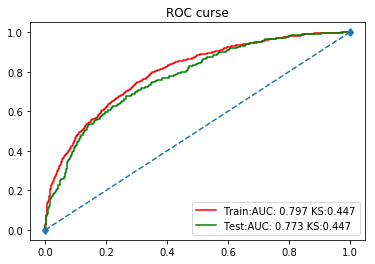

In [18]:
lr = LogisticRegression(C = 0.035, penalty = 'l1')
lr.fit(X_train, y_train)
model_metrics(lr, X_train, X_test, y_train, y_test)

In [19]:
svm_linear = svm.SVC(probability=True)
param = {'C':[0.1,0.2,0.3],'kernel':['rbf']}
gsearch = GridSearchCV(svm_linear, param_grid = param,scoring ='roc_auc', cv=5)
gsearch.fit(X_train, y_train)
print('最佳参数：',gsearch.best_params_)


最佳参数： {'C': 0.1, 'kernel': 'rbf'}


准确性：
Train：0.7493
Test：0.7484
召回率：
Train：0.0000
Test：0.0000
f1_score：
Train：0.0000
Test：0.0000
roc_auc：
Train：0.0000
Test：0.5000
KS：
Train：1.0000
Test：0.0000


G:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
G:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


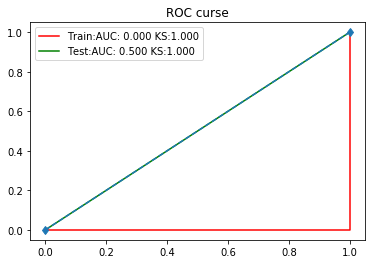

In [20]:
svm_linear = svm.SVC(C = 0.1, kernel = 'rbf', probability=True)
svm_linear.fit(X_train, y_train)
model_metrics(svm_linear, X_train, X_test, y_train, y_test)

In [22]:
param = {'max_depth':range(4,6,1), 'min_samples_split':range(50,100,10)}
gsearch = GridSearchCV(DecisionTreeClassifier(),
                       param_grid = param,scoring ='roc_auc', cv=5)

gsearch.fit(X_train, y_train)
gsearch.best_params_, gsearch.best_score_


({'max_depth': 5, 'min_samples_split': 90}, 0.7390887421636678)

准确性：
Train：0.8082
Test：0.7603
召回率：
Train：0.3981
Test：0.2953
f1_score：
Train：0.5100
Test：0.3827
roc_auc：
Train：0.7882
Test：0.7099
KS：
Train：0.4599
Test：0.3303


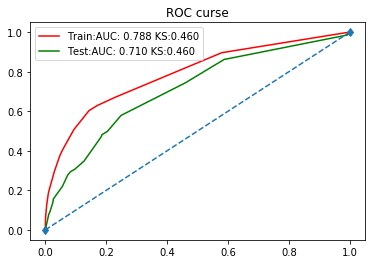

In [23]:
dt = DecisionTreeClassifier(max_depth=5,min_samples_split=90)
dt.fit(X_train, y_train)
model_metrics(dt, X_train, X_test, y_train, y_test)

In [24]:
param_test = {'n_estimators':range(20,200,20),'max_depth':range(5,10,1)}
gsearch = GridSearchCV(estimator = RandomForestClassifier(), 
                       param_grid = param_test, scoring='roc_auc', cv=5)
gsearch.fit(X_train, y_train)
gsearch.best_params_, gsearch.best_score_

({'max_depth': 8, 'n_estimators': 180}, 0.7914125614878796)

准确性：
Train：0.8822
Test：0.7877
召回率：
Train：0.5348
Test：0.2897
f1_score：
Train：0.6947
Test：0.4070
roc_auc：
Train：0.9482
Test：0.7647
KS：
Train：0.7454
Test：0.4112


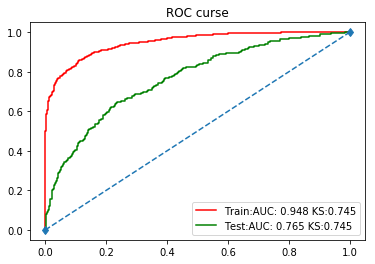

In [25]:
rf = RandomForestClassifier(n_estimators=180, max_depth=8)
rf.fit(X_train, y_train)
model_metrics(rf, X_train, X_test, y_train, y_test)

In [27]:
import warnings
warnings.filterwarnings("ignore")
param_test = {'n_estimators':range(100,200,20),'learning_rate':[0.01,0.02,0.03],'max_depth':range(2,4,1)}
gsearch = GridSearchCV(estimator = XGBClassifier(), param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch.fit(X_train, y_train)
gsearch.best_params_, gsearch.best_score_

({'learning_rate': 0.03, 'max_depth': 2, 'n_estimators': 180},
 0.794096690452664)

准确性：
Train：0.8121
Test：0.7807
召回率：
Train：0.3369
Test：0.2869
f1_score：
Train：0.4735
Test：0.3969
roc_auc：
Train：0.8310
Test：0.7702
KS：
Train：0.5008
Test：0.4147


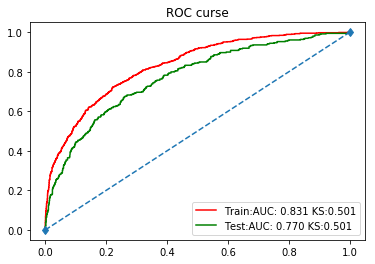

In [28]:
xgb = XGBClassifier(learning_rate =0.03, n_estimators=180, max_depth=2)
xgb.fit(X_train, y_train)
model_metrics(xgb, X_train, X_test, y_train, y_test)